# Python notebook to reproduce _Figure 6_

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import os

import plot_utils
import plot_settings

In [2]:
fig_dir = 'figure_6/'

if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

# Code to reproduce Figure 6b-e

Fig. 6b

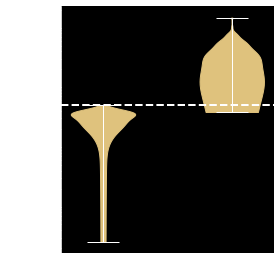

In [4]:
%matplotlib inline

ct_OI = 'SARC'

with open('results/TCGA/{}_obs_absolute_error.txt'.format(ct_OI), 'r') as f:
    obs_ae = json.load(f)
with open('results/TCGA/{}_cens_absolute_error.txt'.format(ct_OI), 'r') as f:
    cens_ae = json.load(f)

color = plot_settings.get_base_color()

ax = plot_settings.get_square_axis()
plot_utils.violin_plot(ax, [obs_ae, cens_ae], xlabel='', ylabel='Loss for individual patient',
                       xticks=['Uncensored', 'Censored'], yscale='log', violin_color=color,
                       violin_line_color='white')
plot_utils.horizontal_line(ax, max(obs_ae), linestyle='--', linewidth=2, color='white')
plot_utils.format_ax(ax)

plt.tight_layout()
plt.show()

Fig. 6c

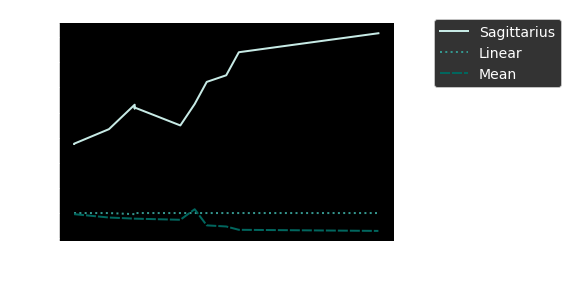

In [8]:
CT = 'THCA'

with open('results/TCGA/{}_remaining_patient_aurocs.txt'.format(CT), 'r') as f:
    remaining_patient_aurocs = json.load(f)
with open('results/TCGA/{}_test_patient_times.txt'.format(CT), 'r') as f:
    test_patient_times = json.load(f)
    
ax = plot_settings.get_wider_axis()
for mod in plot_settings.get_model_ordering(['mean', 'linear', 'Sagittarius']):
    plot_utils.line_plot(
        ax, xdata=[tt[0] for tt in test_patient_times] if CT == 'THCA' else [tt[0] for tt in test_patient_times[:-1]],
        ydata=[np.mean(aurocs) for aurocs in remaining_patient_aurocs[mod]] if CT == 'THCA' else \
                [np.mean(aurocs) for aurocs in remaining_patient_aurocs[mod][:-1]],
        xlabel='Shortest test patient survival time', ylabel='Average test patient AUROC', 
        color=plot_settings.get_model_colors(mod), label_marker=plot_settings.get_model_name_conventions(mod),
        linestyle=plot_settings.get_line_style(mod), linewidth=2)
plot_utils.format_legend(ax, *ax.get_legend_handles_labels(), loc='upper left')
plot_utils.put_legend_outside_plot(ax)
plot_utils.format_ax(ax)
plt.title(CT)

plt.savefig(fig_dir + 'figure_6c.pdf')

Fig. 6d

In [3]:
CT = 'SARC'

with open('results/TCGA/{}_remaining_patient_aurocs.txt'.format(CT), 'r') as f:
    remaining_patient_aurocs = json.load(f)
with open('results/TCGA/{}_test_patient_times.txt'.format(CT), 'r') as f:
    test_patient_times = json.load(f)
    
ax = plot_settings.get_wider_axis()
for mod in plot_settings.get_model_ordering(['mean', 'linear', 'Sagittarius']):
    plot_utils.line_plot(
        ax, xdata=[tt[0] for tt in test_patient_times] if CT == 'THCA' else [tt[0] for tt in test_patient_times[:-1]],
        ydata=[np.mean(aurocs) for aurocs in remaining_patient_aurocs[mod]] if CT == 'THCA' else \
                [np.mean(aurocs) for aurocs in remaining_patient_aurocs[mod][:-1]],
        xlabel='Shortest test patient survival time', ylabel='Average test patient AUROC', 
        color=plot_settings.get_model_colors(mod), label_marker=plot_settings.get_model_name_conventions(mod),
        linestyle=plot_settings.get_line_style(mod), linewidth=2)
plot_utils.format_legend(ax, *ax.get_legend_handles_labels(), loc='upper left')
plot_utils.put_legend_outside_plot(ax)
plot_utils.format_ax(ax)
plt.title(CT)

plt.savefig(fig_dir + 'figure_6d.pdf')

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


Fig. 6e

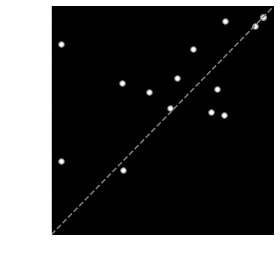

In [11]:
CT = 'SARC'

with open('results/TCGA/{}_remaining_patient_aurocs.txt'.format(CT), 'r') as f:
    remaining_patient_aurocs = json.load(f)
with open('results/TCGA/{}_test_patient_times.txt'.format(CT), 'r') as f:
    test_patient_times = json.load(f)
    
time_point_OI = 56

ax = plot_settings.get_square_axis()
plot_utils.scatter_plot(
    ax, xs=remaining_patient_aurocs['mean'][time_point_OI],
    ys=remaining_patient_aurocs['Sagittarius'][time_point_OI],
    xlabel='{} mutation AUROC'.format(plot_settings.get_model_name_conventions('mean')),
    ylabel='{} mutation AUROC'.format(plot_settings.get_model_name_conventions('Sagittarius')),
    color='white', edge_color='gray', size=30)
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
min0 = min(x0, y0)
max1 = max(x1, y1)
ax.set_xlim(min0, max1)
ax.set_ylim(min0, max1)
plot_utils.show_x_equals_y(ax, color='gray', domain=(min0, max1))
plot_utils.align_axes_ticks(ax, use_y=False, ticks_to_use=[0.2, 0.4, 0.6, 0.8, 1.0])
plot_utils.format_ax(ax)
plt.tight_layout()
plt.savefig(fig_dir + 'figure_6e.pdf')